### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

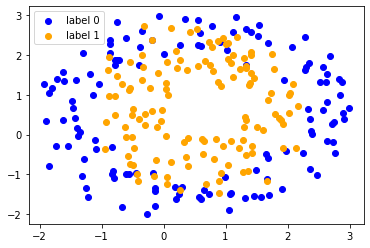

In [2]:
# Load dataset
df = pd.read_csv('q3_data.csv',names=['x1','x2','y'])

# Plot points
zeros=[]
ones=[]
for i in range(len(df)):
    if df['y'][i]==0:
        zeros.append(i)
    else:
        ones.append(i)
plt.scatter(df['x1'][zeros],df['x2'][zeros],color='blue',label='label 0')
plt.scatter(df['x1'][ones],df['x2'][ones],color='orange',label='label 1')
plt.legend();

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def transform(df):
    transformed = []
    for _ in range(len(df)):
        temp=[]
        for i in range(7):
            for j in range(i+1):
                temp.append(df['x1'][_]**(i-j)*df['x2'][_]**(j))
        transformed.append(temp)
    return transformed

In [4]:
transformed=pd.DataFrame(transform(df))
transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,2.640382,0.807780,6.971618,2.132848,0.652508,18.407734,5.631533,1.722871,0.527083,...,3.674622,1.124188,0.343926,338.844683,103.663755,31.714159,9.702406,2.968286,0.908096,0.277817
1,1.0,2.569050,0.620770,6.600019,1.594790,0.385356,16.955781,4.097096,0.989999,0.239218,...,1.578840,0.381502,0.092184,287.498515,69.469471,16.786200,4.056120,0.980097,0.236825,0.057225
2,1.0,2.842336,0.998557,8.078872,2.838234,0.997116,22.962866,8.067215,2.834139,0.995678,...,8.043951,2.825966,0.992806,527.293223,185.246379,65.079958,22.863610,8.032345,2.821889,0.991374
3,1.0,2.902534,0.392374,8.424702,1.138879,0.153957,24.452981,3.305635,0.446867,0.060409,...,0.508927,0.068798,0.009300,597.948302,80.832626,10.927221,1.477178,0.199690,0.026995,0.003649
4,1.0,2.894279,0.531526,8.376851,1.538385,0.282520,24.244946,4.452516,0.817692,0.150167,...,1.257925,0.231014,0.042425,587.817397,107.950999,19.824895,3.640786,0.668620,0.122790,0.022550


## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [5]:
# Define your functions here
def sigmoid(weights,X):
    return 1/(1+np.exp(-(np.dot(X,weights))))

def calculate_gradients(alpha,X,Y,weights,lam):
    regularization = [lam/len(X)*i for i in weights]
    regularization[0] = 0 
    return (np.dot(Y.T-sigmoid(weights,X),X))/len(X) + regularization

def update_weights(prev_weights, current_grads,learning_rate):
    current_weights = prev_weights + learning_rate*current_grads
    return current_weights

def main(X, Y, weights,lam, learning_rate = 0.00005, num_steps = 50000):
    for i in range(num_steps):
        grad=calculate_gradients(learning_rate,X,Y,weights,lam)
        weights=update_weights(weights,grad,learning_rate)
        prev_weights=weights
    return weights

X=transformed
Y=df['y']
weights=np.zeros(X.shape[1])
lam=1
final_weights=main(X, Y, weights,lam)
# Plot decision boundary


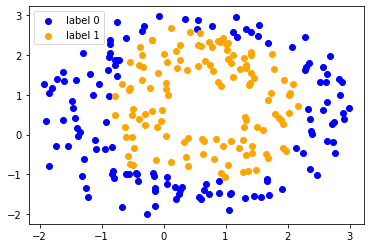

In [6]:
def predict(weights,X):
    Z=1/(1+np.exp(-(np.dot(X,weights))))
    Y=np.where( Z > 0.5, 1, 0 )        
    return Y

pred = predict(final_weights,X)
zeros=[]
ones=[]
for i in range(len(pred)):
    if pred[i]==0:
        zeros.append(i)
    else:
        ones.append(i)

plt.scatter(df['x1'][zeros],df['x2'][zeros],color='blue',label='label 0')
plt.scatter(df['x1'][ones],df['x2'][ones],color='orange',label='label 1')
plt.legend();

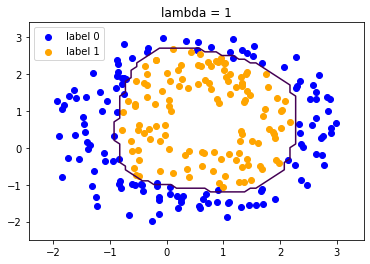

In [7]:
def plot(x1,x2,j):
    x_min, x_max = x1.min() - .5, x1.max() + .5
    y_min, y_max = x2.min() - .5, x2.max() + .5
    h = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    xx1 = pd.DataFrame(xx.ravel())
    yy1 = pd.DataFrame(yy.ravel())
    
    df_1=pd.DataFrame()
    df_1['x1']=xx1
    df_1['x2']=yy1
    df_1 = np.array(transform(df_1))
    H=predict(final_weights,df_1)
    Z = H.reshape(xx.shape)
    plt.figure()
    plt.scatter(df['x1'][zeros],df['x2'][zeros],color='blue',label='label 0')
    plt.scatter(df['x1'][ones],df['x2'][ones],color='orange',label='label 1')
    plt.contour(xx,yy,Z,levels=[0])
    plt.title(f'lambda = {j}')
    plt.legend();
plot(df['x1'],df['x2'],lam)

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100, 10000]$
- draw the decision boundaries


Accuracy with lambda = 0 is 85.31746031746032
Accuracy with lambda = 1 is 85.31746031746032
Accuracy with lambda = 100 is 83.73015873015873
Accuracy with lambda = 10000 is 77.38095238095238


<Figure size 432x288 with 0 Axes>

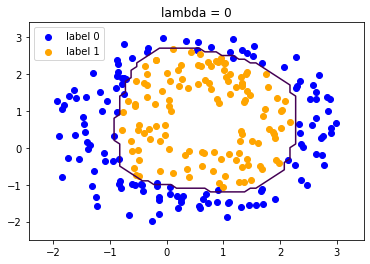

<Figure size 432x288 with 0 Axes>

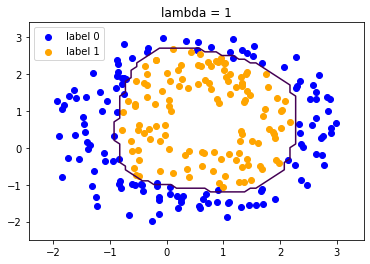

<Figure size 432x288 with 0 Axes>

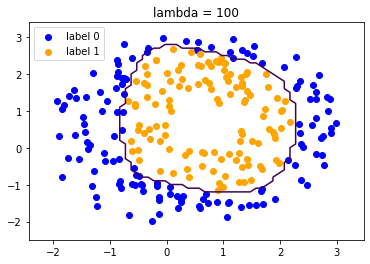

<Figure size 432x288 with 0 Axes>

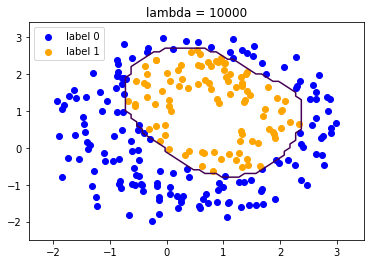

In [8]:
lam = [0,1,100,10000]
for j in lam:
    X=transformed
    Y=df['y']
    weights=np.zeros(X.shape[1])
    final_weights=main(X, Y, weights,j)
    pred = predict(final_weights,X)
    zeros=[]
    ones=[]
    plt.figure()
    miss=0
    for i in range(len(pred)):
        if pred[i]==0:
            zeros.append(i)
        else:
            ones.append(i)
        if pred[i]!=Y[i]:
            miss+=1
    acc = (len(Y)-miss)/len(Y)
    print(f'Accuracy with lambda = {j} is {acc*100}')
    plot(df['x1'],df['x2'],j)


Answer for part (d) here: 



Here we can see that as the value of lambda increases the decision boundary starts to shrink. The change is quite visible in the plots for lambda equal 100 and lambda equals 10000. This is becuase here the model is paying the penalty to use the co-efficients of the non zero terms to be included in the data. Thus if there is a term which is not contributing a lot to change in the data the model tends to drop it, there by creating a lesser parameter. This makes data reduction which results in lowering the accuracy of the model as the parameter is missing from the data. Regularization is used to reduce overfitting but having too large regularization may result in underfitting. 